# Installs

In [ ]:
pip install jmd_imagescraper

### Imports

In [1]:
from fastai.vision.all import *

In [2]:
from  jmd_imagescraper.core  import  *
from  pathlib  import  Path
from jmd_imagescraper.imagecleaner  import  *

## Busqueda y descarga

In [3]:
CubeList = 'Rubik 3*3*3', 'Mirror cube', 'Pyraminx', 'Ghost cube', 'Petaminx'  #vector con cartoons para el data set
path = Path() . cwd () / "CubosMagicos" # path donde voy a guardar las imagenes

In [4]:
for i in CubeList: #recorro la lista de cartoons
    duckduckgo_search ( path , f'{i}', f'{i}',  max_results = 250 ) # las descargo en carpetas con la propia etiqueta de los cartoons

Duckduckgo search: Rubik 3*3*3


Duckduckgo search: Mirror cube


Duckduckgo search: Pyraminx


Duckduckgo search: Ghost cube


Duckduckgo search: Petaminx


# filtro las fotos

In [5]:
display_image_cleaner ( path )

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

## Comprobacion de integridad imagenes


In [12]:
fns = get_image_files(path)
fns

(#965) [Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/137_3b24192b.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/184_8219c6a1.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/043_91f37c7a.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/142_ba2b2da7.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/118_995b5838.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/036_d9363401.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/198_52f7d1fd.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/138_2cda69f0.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/189_a1e6c986.jpg'),Path('/notebooks/clean/Mios/CubosMagicos/Ghost cube/196_60216501.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
failed.map(Path.unlink);

## Data loader

In [15]:
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  ## pasa el tipo de dato para la entrada y para la salida
    get_items=get_image_files,           ## como tomar los datos
    splitter=RandomSplitter(valid_pct=0.2, seed=42), ## como separar la validacion del test
    get_y=parent_label,  # como etiquetar las entradas (en este caso el nombre del directorio padre)
    item_tfms=Resize(225), # normalizo el tamaño de todas las imagenes
    batch_tfms= aug_transforms()) # Altero las imagenes del data set para aumentar los datos de entrada

In [16]:
loader = block.dataloaders(path)  # genero el loader

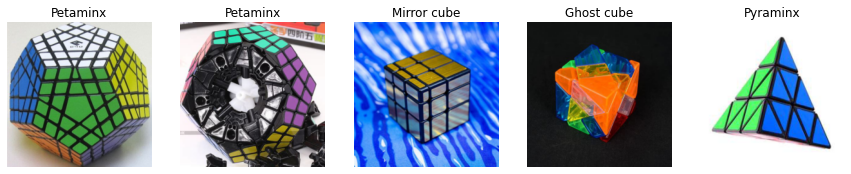

In [17]:
loader.valid.show_batch(max_n=5, nrows=1) #mostrar un tensor de ejmplo (agregar unique = true para que se muestren de una sola imagen)`

## Entrenamiento

In [18]:
# Learner
learn = cnn_learner(loader, resnet34, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.683408,0.362122,0.119171,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.425423,0.220494,0.082902,00:12
1,0.329355,0.178192,0.072539,00:11
2,0.260524,0.137848,0.031088,00:11
3,0.205289,0.151685,0.051813,00:11
4,0.160697,0.184541,0.046632,00:11
5,0.128137,0.171755,0.056995,00:11
6,0.103767,0.127564,0.051813,00:11
7,0.093827,0.169993,0.041451,00:11
8,0.087166,0.141485,0.036269,00:11
9,0.078046,0.119953,0.031088,00:11


## Matriz de confucion e imagenes top loss

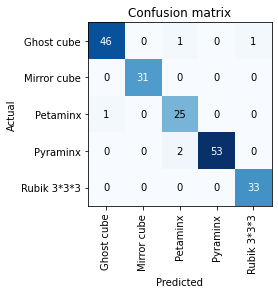

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

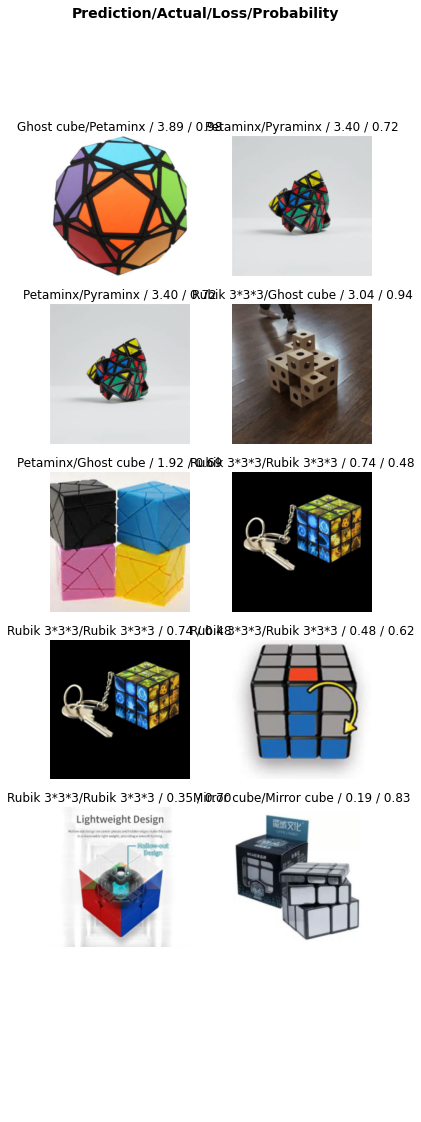

In [20]:
interp.plot_top_losses(10, nrows =6)

## Exportar

In [21]:
learn.export(fname = 'entrega.pkl') #exporta un archivo .pkl